# Analysing Solar Wind distributions based on the species

In [1]:
from starstream import WIND
import pandas as pd

inst = WIND.TDP_PM('/data/SW/')

In [2]:
from download_data import solar_wind_events

halloween_storm, almost_carrington, patricks_day, extra_one, high_speed = inst.get_pandas(solar_wind_events)

In [3]:
from scipy.constants import m_p, k
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    for value in ['Vpx', 'Vpy', 'Vpz', 'Vax', 'Vay', 'Vaz']:
        df[value]*=1000
    for value in ['Tp', 'Ta']:
        df[value]*=11604.5
    for value in ['Np', 'Na']:
        df[value]*=10e6
    
    df['Vp'] = df.apply(lambda row: (row['Vpx']**2 + row['Vpy']**2 + row['Vpz']**2)**(1/2), axis = 1)
    df['kinetic_energy_p'] = df.apply(lambda row: (1/2) * m_p * row['Vp']**2, axis = 1)
    df['temp_energy_p'] = df.apply(lambda row: (3/2) * row['Np'] * k * row['Tp'], axis = 1)
    df['proton_energy'] = df.apply(lambda row: row['kinetic_energy_p'] + row['temp_energy_p'], axis = 1)
    df['Va'] = df.apply(lambda row: (row['Vax']**2 + row['Vay']**2 + row['Vaz']**2)**(1/2), axis = 1)
    df['kinetic_energy_a'] = df.apply(lambda row: (1/2) * m_p * row['Va']**2, axis = 1)
    df['temp_energy_a'] = df.apply(lambda row: (3/2) * row['Na'] * k * row['Ta'], axis = 1)
    df['alpha_energy'] = df.apply(lambda row: row['kinetic_energy_a'] + row['temp_energy_a'], axis = 1)
    return df

In [4]:
import seaborn as sns

def show_data(df: pd.DataFrame) -> pd.DataFrame:
    sns.jointplot(
        data = df,
        x = 'proton_energy',
        y = 'alpha_energy',
        kind = 'kde',
    )

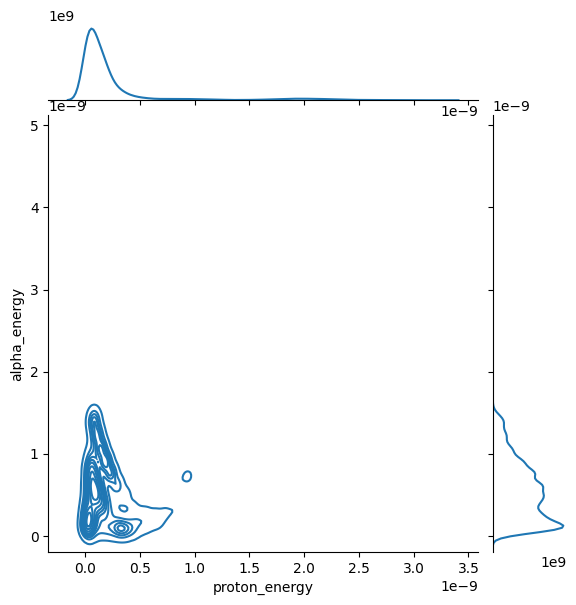

In [5]:
show_data(
    preprocess_data(
        halloween_storm
    )
)

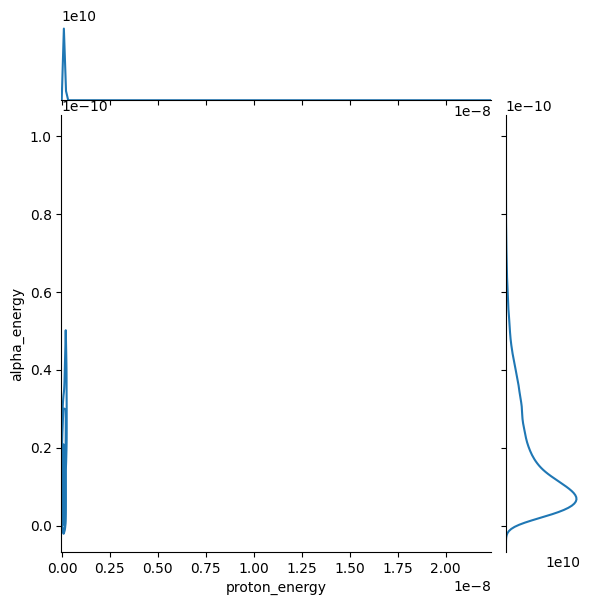

In [6]:
show_data(
    preprocess_data(
        almost_carrington
    )
)

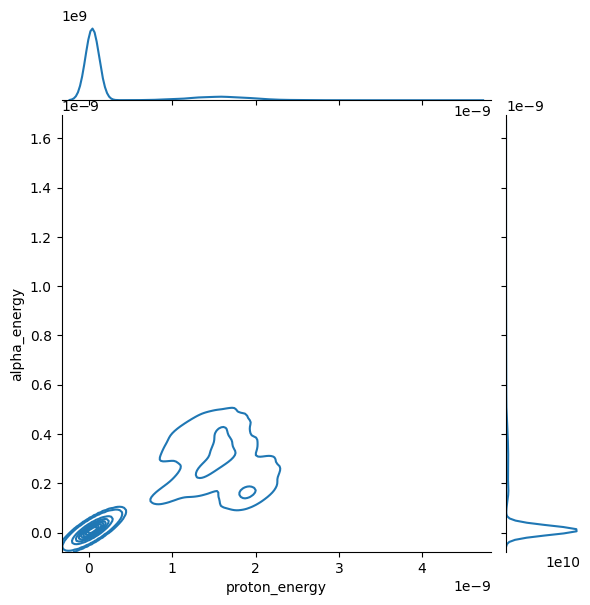

In [9]:
show_data(
    preprocess_data(
        extra_one
    )
)

Clearly, the proton distribution is always prone to follow the Boltzmann distribution, on the other hand, species such as electrons or alpha particles, follow different distributions.